Tri Cities Model

In [1]:
import numpy as np
from scipy import linalg
import pandas as pd
import networkx as nx
from numpy import random
import inspect
import sys
import weakref
from EpiCommute import SIRModel
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(precision = 5, suppress = True, linewidth = 100)
from IPython.display import clear_output, display
from ipywidgets import interactive, interact

# Declare Objects

In [2]:
#Highway is a class that holds the weight of the pathway between cities and all of the connections formed by the highway
class Highway:
    instances=[]
    def __init__(self,name,weight=0,cities=np.array([[]])):
        self.__class__.instances.append(self)
        self.name=name
        self.weight=weight
        self.cities=cities
    


In [3]:
#City simply holds the population and location of each city
class City:
    instances=[]
    def __init__(self,name,pop=0,loc=[0,0]):
        self.__class__.instances.append(self)
        self.name=name
        self.pop=pop
        self.loc=loc
        

In [4]:
#Declaring Cities(populations and locations are accurate)
Johnson_City = City('Johnson_City',66515,[36.3345,-82.3703])
Bristol =City('Bristol',26852,[36.5951,-82.1887])
Jonesborough = City('Jonesborough',5247,[36.2943,-82.4735])
Elizabethton = City('Elizabethton',13577,[36.3487,-82.2107])
Gray= City('Gray',1016,[36.4172,-82.4720])
Kingsport = City('Kingsport',53376,[36.5484,-82.5618])
#Declaring Highways
I_26 = Highway('I_26',63665,np.array([['Kingsport','Gray'],['Gray','Johnson_City']]))
I_81 = Highway('I_81',40277,np.array([['Gray','Bristol']]))
Three_21=Highway('Three_21',26322,np.array([['Jonesborough','Johnson_City'],['Johnson_City','Elizabethton']]))
Nineteen_e = Highway('Nineteen_e',9370,np.array([['Elizabethton','Bristol']]))
Eleven_w = Highway('Eleven_w',16644,np.array([['Kingsport','Bristol']]))
Seventy_Five=Highway('Seventy_Five',5762,np.array([['Gray','Jonesborough']]))

In [5]:
Pre_Highway_List=[]
for instance in Highway.instances:
    Pre_Highway_List.append(instance.name)
#Remove duplicates
    Highway_List=[]
for i in Pre_Highway_List:
    if i not in Highway_List:
        Highway_List.append(i)
Highway_List

['I_26', 'I_81', 'Three_21', 'Nineteen_e', 'Eleven_w', 'Seventy_Five']

# Model setup

## Create Graph




In [6]:
from numpy import random
#Create Tri_Cities Graph
Tri_Cities = nx.Graph()
#Nodes are connected with self via random weights


In [7]:
# Populate the graph with weighted edges using the list of highways
for a in range(len(Highway_List)):
    HW=globals()[Highway_List[a]]
    for b in range(len(HW.cities)):
        Tri_Cities.add_edge(HW.cities[b][0],HW.cities[b][1],weight=HW.weight)


In [8]:
City_List=list(Tri_Cities.nodes())
City_List

['Kingsport',
 'Gray',
 'Johnson_City',
 'Bristol',
 'Jonesborough',
 'Elizabethton']

In [9]:
pop_array=np.zeros(len(Tri_Cities.nodes))
for a in range(len(Tri_Cities.nodes)):
    pop_array[a]=eval(list(Tri_Cities.nodes)[a]).pop
pop_array    

array([53376.,  1016., 66515., 26852.,  5247., 13577.])

## Mobility

In [10]:
norm_pop = pop_array/sum(pop_array)
mobility_1=nx.adj_matrix(Tri_Cities).toarray()
mobility_t=np.zeros((6,6))
for a in range(6):
    mobility_t[a,:]=mobility_1[a]/sum(mobility_1[a])
mobility_t
difff= 3
for z in range(500):
    rand=pop_array*.1*z/max(pop_array)
    mobility_2 =mobility_t+np.diag(rand)
    mobility_2
    for a in range(6):
        mobility_2[a,:]=mobility_2[a,:]/sum(mobility_2[a,:])
    eigs=np.linalg.eig(mobility_2.T)
    whereat=np.where(abs(eigs[0]-1)<.01)[0][0]
    stab_dist=eigs[1][:,whereat]/sum(eigs[1][:,whereat])
    if(sum((stab_dist-norm_pop)*(stab_dist-norm_pop))<difff):
        answer=rand
        difff=sum((stab_dist-norm_pop)*(stab_dist-norm_pop))
    
mobility_2=mobility_t +np.diag(answer)
for a in range(6):
    mobility_2[a,:]=mobility_2[a,:]/sum(mobility_2[a,:])
mobility_2


array([[0.90374, 0.07631, 0.     , 0.01995, 0.     , 0.     ],
       [0.31154, 0.15162, 0.31154, 0.1971 , 0.0282 , 0.     ],
       [0.     , 0.0431 , 0.92126, 0.     , 0.01782, 0.01782],
       [0.04387, 0.10616, 0.     , 0.82527, 0.     , 0.0247 ],
       [0.     , 0.09339, 0.42664, 0.     , 0.47997, 0.     ],
       [0.     , 0.     , 0.21766, 0.07748, 0.     , 0.70486]])

In [11]:
# outbreak source is city of our choice


# Generate multiple results with varying r0/mu
examples={}
variations=100
rvar=4

for a in range(variations):
        for c in range(6):
            model = SIRModel(
            mobility_2,
            pop_array,
            outbreak_source=c,
            mu=1/8,
            R0=0.5+a*rvar/variations,         
            dt=0.1,                   # simulation time interval
            dt_save=1,                # time interval when to save observables
            I0=400,
            T_max=120,# number of initial infected
            VERBOSE=True              # print verbose output
       )
            examples[City_List[c]+str(a)]=model.run_simulation()

        


Starting Simulation ...
Simulation completed
Time: 0min 2.06s
Starting Simulation ...
Simulation completed
Time: 0min 2.30s
Starting Simulation ...
Simulation completed
Time: 0min 1.78s
Starting Simulation ...
Simulation completed
Time: 0min 1.70s
Starting Simulation ...
Simulation completed
Time: 0min 1.80s
Starting Simulation ...
Simulation completed
Time: 0min 2.27s
Starting Simulation ...
Simulation completed
Time: 0min 2.09s
Starting Simulation ...
Simulation completed
Time: 0min 1.99s
Starting Simulation ...
Simulation completed
Time: 0min 2.40s
Starting Simulation ...
Simulation completed
Time: 0min 2.65s
Starting Simulation ...
Simulation completed
Time: 0min 2.69s
Starting Simulation ...
Simulation completed
Time: 0min 1.61s
Starting Simulation ...
Simulation completed
Time: 0min 2.80s
Starting Simulation ...
Simulation completed
Time: 0min 2.48s
Starting Simulation ...
Simulation completed
Time: 0min 2.23s
Starting Simulation ...
Simulation completed
Time: 0min 2.22s
Starting

Simulation completed
Time: 0min 3.19s
Starting Simulation ...
Simulation completed
Time: 0min 2.89s
Starting Simulation ...
Simulation completed
Time: 0min 2.93s
Starting Simulation ...
Simulation completed
Time: 0min 3.05s
Starting Simulation ...
Simulation completed
Time: 0min 3.02s
Starting Simulation ...
Simulation completed
Time: 0min 3.01s
Starting Simulation ...
Simulation completed
Time: 0min 2.91s
Starting Simulation ...
Simulation completed
Time: 0min 3.08s
Starting Simulation ...
Simulation completed
Time: 0min 3.44s
Starting Simulation ...
Simulation completed
Time: 0min 2.96s
Starting Simulation ...
Simulation completed
Time: 0min 2.77s
Starting Simulation ...
Simulation completed
Time: 0min 2.62s
Starting Simulation ...
Simulation completed
Time: 0min 2.87s
Starting Simulation ...
Simulation completed
Time: 0min 4.81s
Starting Simulation ...
Simulation completed
Time: 0min 3.21s
Starting Simulation ...
Simulation completed
Time: 0min 3.56s
Starting Simulation ...
Simulati

Simulation completed
Time: 0min 2.91s
Starting Simulation ...
Simulation completed
Time: 0min 2.90s
Starting Simulation ...
Simulation completed
Time: 0min 2.97s
Starting Simulation ...
Simulation completed
Time: 0min 2.66s
Starting Simulation ...
Simulation completed
Time: 0min 2.85s
Starting Simulation ...
Simulation completed
Time: 0min 2.85s
Starting Simulation ...
Simulation completed
Time: 0min 2.93s
Starting Simulation ...
Simulation completed
Time: 0min 2.92s
Starting Simulation ...
Simulation completed
Time: 0min 2.87s
Starting Simulation ...
Simulation completed
Time: 0min 3.07s
Starting Simulation ...
Simulation completed
Time: 0min 2.98s
Starting Simulation ...
Simulation completed
Time: 0min 2.94s
Starting Simulation ...
Simulation completed
Time: 0min 2.80s
Starting Simulation ...
Simulation completed
Time: 0min 2.68s
Starting Simulation ...
Simulation completed
Time: 0min 2.67s
Starting Simulation ...
Simulation completed
Time: 0min 2.86s
Starting Simulation ...
Simulati

Simulation completed
Time: 0min 2.65s
Starting Simulation ...
Simulation completed
Time: 0min 2.68s
Starting Simulation ...
Simulation completed
Time: 0min 3.01s
Starting Simulation ...
Simulation completed
Time: 0min 2.69s
Starting Simulation ...
Simulation completed
Time: 0min 2.66s
Starting Simulation ...
Simulation completed
Time: 0min 2.67s
Starting Simulation ...
Simulation completed
Time: 0min 2.66s
Starting Simulation ...
Simulation completed
Time: 0min 2.66s
Starting Simulation ...
Simulation completed
Time: 0min 2.69s
Starting Simulation ...
Simulation completed
Time: 0min 2.68s
Starting Simulation ...
Simulation completed
Time: 0min 2.98s
Starting Simulation ...
Simulation completed
Time: 0min 2.99s
Starting Simulation ...
Simulation completed
Time: 0min 3.04s
Starting Simulation ...
Simulation completed
Time: 0min 2.97s
Starting Simulation ...
Simulation completed
Time: 0min 3.00s
Starting Simulation ...
Simulation completed
Time: 0min 2.72s
Starting Simulation ...
Simulati

Simulation completed
Time: 0min 2.59s
Starting Simulation ...
Simulation completed
Time: 0min 2.60s
Starting Simulation ...
Simulation completed
Time: 0min 2.65s
Starting Simulation ...
Simulation completed
Time: 0min 2.57s
Starting Simulation ...
Simulation completed
Time: 0min 2.78s
Starting Simulation ...
Simulation completed
Time: 0min 2.84s
Starting Simulation ...
Simulation completed
Time: 0min 2.65s
Starting Simulation ...
Simulation completed
Time: 0min 2.68s
Starting Simulation ...
Simulation completed
Time: 0min 2.58s
Starting Simulation ...
Simulation completed
Time: 0min 2.68s
Starting Simulation ...
Simulation completed
Time: 0min 2.67s
Starting Simulation ...
Simulation completed
Time: 0min 2.62s
Starting Simulation ...
Simulation completed
Time: 0min 2.71s
Starting Simulation ...
Simulation completed
Time: 0min 2.62s
Starting Simulation ...
Simulation completed
Time: 0min 2.64s
Starting Simulation ...
Simulation completed
Time: 0min 2.66s
Starting Simulation ...
Simulati

In [12]:
names=list(examples)
sum(pop_array)
10330/sum(pop_array)

0.0620111295870527

In [13]:
maxsensitivities=np.zeros((6,variations-1))
infectedsensitivities=np.zeros((6,variations-1))
endsensitivities=np.zeros((6,variations-1))
for a in range(6):
    for b in range(variations-1):
        currentI=examples[City_List[a]+str(b)]['I_total']
        upperI=examples[City_List[a]+str(b+1)]['I_total']
        currentR=examples[City_List[a]+str(b)]['R_total']
        upperR=examples[City_List[a]+str(b+1)]['R_total'] 
        currenthl= 2*np.where(np.cumsum(currentI)<.5*np.cumsum(currentI)[len(currentI)-1])[0][-1]
        upperhl= 2*np.where(np.cumsum(upperI)<.5*np.cumsum(upperI)[len(upperI)-1])[0][-1]
        maxsensitivities[a,b]=(max(upperI)-max(currentI))*variations/rvar
        infectedsensitivities[a,b]=(upperR[-1]-currentR[-1])*variations/rvar
        endsensitivities[a,b]=(upperhl-currenthl)*variations/rvar
infectedsensitivities       

array([[ 0.02086,  0.01606,  0.02071,  0.03032,  0.02086, -0.009  ,  0.02836,  0.02761, -0.02296,
         0.12591,  0.05673,  0.30975,  0.08809,  0.404  ,  0.33962,  0.23667,  0.18399,  0.84237,
         0.82871,  0.68404,  1.58509,  1.59619,  1.13771,  0.92041,  1.5189 ,  1.39524,  0.91891,
         1.12001,  1.05052,  0.33602,  1.11265,  0.60075,  0.31276,  0.53517,  0.38374,  0.46298,
         0.37639,  0.28169,  0.36108,  0.14662,  0.28604,  0.17679,  0.28379,  0.10415,  0.24357,
         0.18174,  0.11481,  0.15052,  0.18819,  0.14947,  0.07069,  0.13297,  0.14467,  0.08329,
         0.13672,  0.07669,  0.13777,  0.05103,  0.02911,  0.11661,  0.11391,  0.06348,  0.03392,
         0.06633,  0.08839,  0.03692,  0.02971,  0.08254,  0.07804,  0.02191,  0.05208,  0.04082,
         0.04817,  0.02881,  0.06033,  0.0096 ,  0.02176,  0.01441,  0.06108,  0.0078 ,  0.04877,
         0.01486,  0.04502,  0.03587,  0.00375,  0.02791, -0.0027 ,  0.03362,  0.01531,  0.05628,
        -0.01216,  0

Text(0, 0.5, 'ΔMI/ ΔR0')

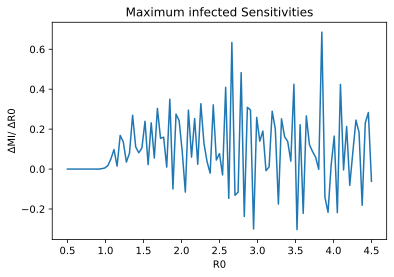

In [33]:
import matplotlib
import matplotlib.pyplot as plt
x=np.linspace(.5,4.5,variations-1)
fig=plt.figure()
plt.plot(x,maxsensitivities[2])
plt.title("Maximum infected Sensitivities")

plt.xlabel("R0")
plt.ylabel( '\u0394MI/ \u0394R0')

Text(0, 0.5, 'ΔT/ ΔR0')

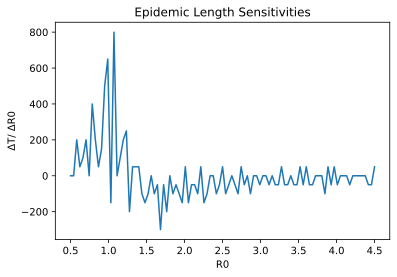

In [34]:
x=np.linspace(.5,4.5,variations-1)
fig=plt.figure()
plt.plot(x,endsensitivities[2])
plt.title("Epidemic Length Sensitivities")

plt.xlabel("R0")
plt.ylabel( '\u0394T/ \u0394R0')

Text(0, 0.5, 'ΔI/ ΔR0')

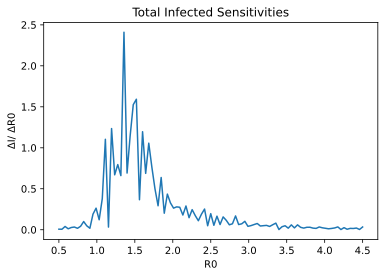

In [35]:
x=np.linspace(.5,4.5,variations-1)
fig=plt.figure()
plt.plot(x,infectedsensitivities[2])
plt.title("Total Infected Sensitivities")

plt.xlabel("R0")
plt.ylabel( '\u0394I/ \u0394R0')

In [17]:
result=examples[names[int(variations/2)]]
1600/(.02*sum(pop_array))

0.4802410810226734

# Results

## Epidemic curve

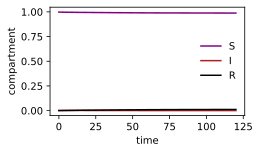

In [18]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rc('figure', dpi=200)
#plot SIR.
figure = plt.figure(figsize=(3.5,2))
plt.plot(result['t'], result['S_total'], label='S', color='purple')
plt.plot(result['t'], result['I_total'], label='I', color='firebrick')
plt.plot(result['t'], result['R_total'], label='R', color='k')
plt.legend(frameon=False, loc='center right')
plt.xlabel("time")
plt.ylabel("compartment")
plt.show()

## Spread of infected

In [19]:
citylocations=np.zeros((6,2))
for a in range(6):
    citylocations[a,:]= globals()[list(Tri_Cities.nodes)[a]].loc
#City locations listed in same order as result array so cities can be labelled
citylocations

array([[ 36.5484, -82.5618],
       [ 36.4172, -82.472 ],
       [ 36.3345, -82.3703],
       [ 36.5951, -82.1887],
       [ 36.2943, -82.4735],
       [ 36.3487, -82.2107]])

In [20]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='html5')
%config InlineBackend.figure_format = 'svg'

In [21]:
lbls={}
for a in range(6):
    lbls[list(Tri_Cities.nodes())[a]]=list(Tri_Cities.nodes())[a]
poss={}
for a in range(6):
    poss[City_List[a]]=np.flip(eval(City_List[a]).loc)
poss    

{'Kingsport': array([-82.5618,  36.5484]),
 'Gray': array([-82.472 ,  36.4172]),
 'Johnson_City': array([-82.3703,  36.3345]),
 'Bristol': array([-82.1887,  36.5951]),
 'Jonesborough': array([-82.4735,  36.2943]),
 'Elizabethton': array([-82.2107,  36.3487])}

C:\Users\Bumbulizer\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


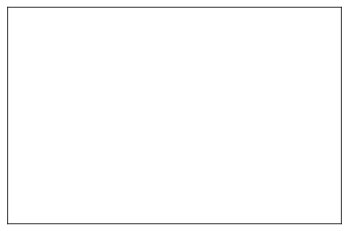

In [22]:
fig = plt.Figure(figsize = (3,3))
ax = fig.add_subplot()

def f(t=0):
    t=2*t
    ax.clear()
    ax.set_title(t)
    ax.set_ylim([36.2,36.7])
    ax.set_xlim([-82.65,-82.1])
    
    nx.draw_networkx(Tri_Cities,poss,
               with_labels = True,
               labels = lbls,
               font_size=8,
               node_size = 50, 
               edge_color = 'gray',
               node_color = result['I'][t],
               cmap = 'Reds', ax  = ax,
               vmin = 0,  vmax = 1)
    


anim =FuncAnimation(fig, f, frames=50, interval=100, 
                     blit=False, repeat=True)
anim
